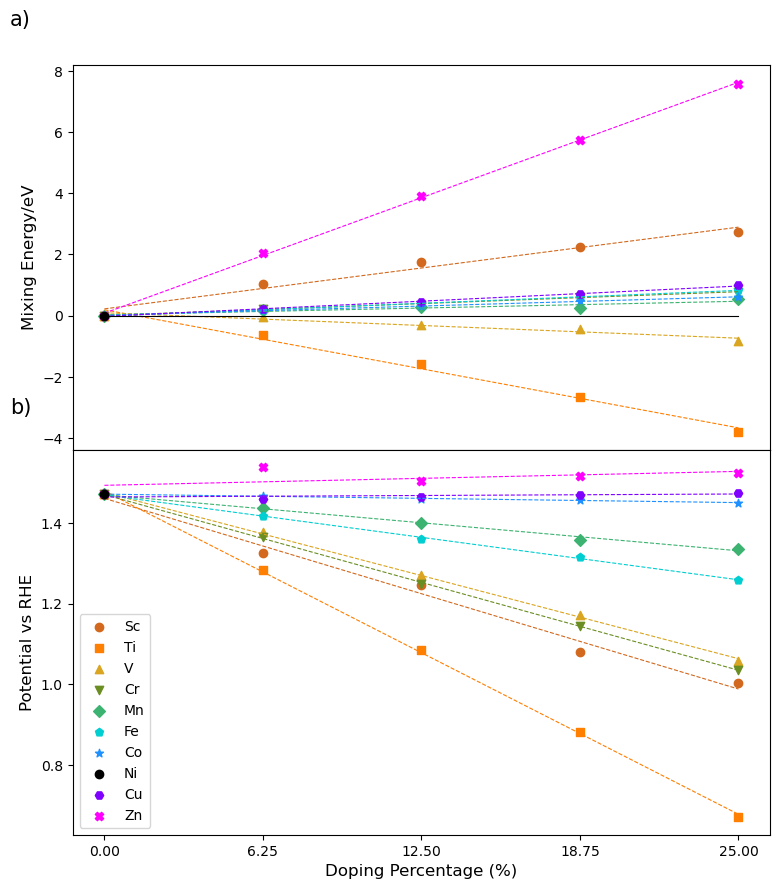

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Données
elements = {
    'Sc': {
        'energy1': np.array([0.0, 1.040597185, 1.76408648, 2.234440625, 2.74407265]),
        'energy2': np.array([1.47, 1.324659271, 1.244893612, 1.080599851, 1.002293694])
    },
    'Ti': {
        'energy1': np.array([0.0, -0.630208638, -1.595905265, -2.658118143, -3.81350752]),
        'energy2': np.array([1.47, 1.283160186, 1.085954713, 0.881475265, 0.671420882])
    },
    'V': {
        'energy1': np.array([0.0, -0.035266, -0.29955377, -0.44025467, -0.83808032]),
        'energy2': np.array([1.47, 1.375999484, 1.271325926, 1.171536372, 1.057975289])
    },
    'Cr': {
        'energy1': np.array([0.0, 0.218619857, 0.358476295, 0.615185442, 0.77393979]),
        'energy2': np.array([1.47, 1.363580986, 1.247552418, 1.145002414, 1.035959194])
    },
    'Mn': {
        'energy1': np.array([0.0, 0.194014558, 0.275670325, 0.234737992, 0.53365406]),
        'energy2': np.array([1.47, 1.436181424, 1.399965308, 1.357414918, 1.336242184])
    },
    'Fe': {
        'energy1': np.array([0.0, 0.187151845, 0.37013245, 0.620006295, 0.83742746]),
        'energy2': np.array([1.47, 1.417011126, 1.359765633, 1.314516832, 1.258545441])
    },    
    'Co': {
        'energy1': np.array([0.0, 0.169311918, 0.318416235, 0.466849533, 0.60766252]),
        'energy2': np.array([1.47, 1.466722966, 1.459999395, 1.455908203, 1.449224898])
    },
    'Cu': {
        'energy1': np.array([0.0, 0.216897912, 0.436625685, 0.714989038, 0.98978493]),
        'energy2': np.array([1.47, 1.459834078, 1.463625559, 1.469562746, 1.474354322])
    },
    'Zn': {
        'energy1': np.array([0.0, 2.03794339, 3.90206274, 5.75866408, 7.58045926]),
        'energy2': np.array([1.47, 1.537426645, 1.502328358, 1.515967393, 1.523856818])
    }
}
doping_percentage = np.array([0.0, 6.25, 12.5, 18.75, 25.0])
zero=np.array([0, 0, 0, 0, 0])
# Listes de couleurs et marqueurs
colors = ['chocolate', "#FF7F00", 'goldenrod','olivedrab', 'mediumseagreen', 'darkturquoise', 'dodgerblue', "#7F00FF", "#FF00FF"]
markers = ['o','s','^','v','D','p','*','H','X']
for idx, element in enumerate(elements):
    elements[element]['color'] = colors[idx % len(colors)]
    elements[element]['marker'] = markers[idx % len(markers)]
    
#plt.figure(figsize=(8, 10))
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(9, 10))
fig.subplots_adjust(hspace=0)


# Premier plot
for element, data in elements.items():
    energy1 = data['energy1']
    color = data['color']
    marker = data['marker']
    # Régression linéaire
    model1 = LinearRegression()
    model1.fit(doping_percentage.reshape(-1, 1), energy1)
    doping_range = np.linspace(0.0, 25.0, 100).reshape(-1, 1)
    energy1_pred = model1.predict(doping_range)
    axs[0].scatter(doping_percentage, energy1, color=color, label=f'{element}', marker=marker)
    axs[0].plot(doping_range, energy1_pred, color=color, linestyle='--', linewidth=0.8)
    if element == 'Zn':
        axs[0].plot(0, 0, color='black', linestyle='--', linewidth=0.8, marker='o')
axs[0].plot(doping_percentage, zero, color='black', linestyle='-', linewidth=0.8)

# Affichage du premier plot
axs[0].set_xlabel('Doping Percentage (%)', fontsize=12)
axs[0].set_ylabel('Mixing Energy/eV', fontsize=12)
#plt.legend()
#plt.xticks(doping_percentage)

# Deuxième plot
for element, data in elements.items():
    if element == 'Cu':
        axs[1].scatter(0, 1.47, color='black', label=f'Ni', marker='o')
    energy2 = data['energy2']
    color = data['color']
    marker = data['marker']
    # Régression linéaire
    model2 = LinearRegression()
    model2.fit(doping_percentage.reshape(-1, 1), energy2)
    doping_range = np.linspace(0.0, 25.0, 100).reshape(-1, 1)
    energy2_pred = model2.predict(doping_range)
    axs[1].scatter(doping_percentage, energy2, color=color, label=f'{element}', marker=marker)
    axs[1].plot(doping_range, energy2_pred, color=color, linestyle='--', linewidth=0.8)
    if element == 'Zn':
        axs[1].plot(0, 1.47, color='black', linestyle='--', linewidth=0.8, marker='o')

# Affichage du deuxième plot
axs[1].set_xlabel('Doping Percentage (%)', fontsize=12)
axs[1].set_ylabel('Potential vs RHE', fontsize=12)
plt.legend()
axs[1].set_xticks(doping_percentage)

plt.text(-3.3, 2.63, 'a)', horizontalalignment='center', fontsize=15, c='black')
plt.text(-3.3, 1.67, 'b)', horizontalalignment='center', fontsize=15, c='black')

plt.savefig('/Users/ltreps/Downloads/doped_bulk.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
